In [6]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram

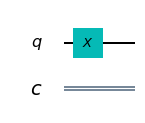

In [17]:
# Build a circuit
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.draw(output="mpl")

In [21]:
# Execute the circuit and get the state vector of the result
simulator = Aer.get_backend("statevector_simulator") # Change the backend to get the state vector
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 1.+0.j]


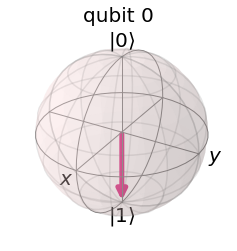

In [23]:
# Represent the state vector in the bloch sphere
plot_bloch_multivector(statevector)

In [24]:
# Execute the circuit and get the unitary matrix
simulator = Aer.get_backend("unitary_simulator") # Change backend to get the unitary matrix
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


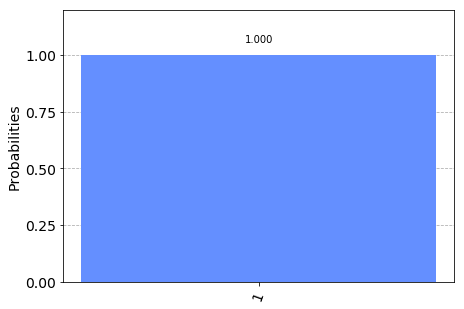

In [25]:
# Add the measure "gate" in qreg 0 to creg 0
circuit.measure([0], [0])
# Execute the circuit to get measurements in classical bits
backend = Aer.get_backend("qasm_simulator")
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)